# Momento de Retroalimentación: Reto Limpieza del Conjunto de Datos


| Nombre                              | Matrícula  |
|-------------------------------------|------------|
| Fernando Bustos Monsiváis           | A00829931  |
| Ramón Yuri Danzos García            | A00227838  |
| Axel Amós Hernández Cárdenas        | A00829837  |
| Josué Emmanuel Flores Mendoza       | A00833132  |
| Jesus Daniel Martínez García        | A00833591  |

<br/>

* Documento: https://docs.google.com/document/d/1onDZneOfuENOMxC73YR04wQJgJMwBfXpQlSKVMDnG7U/edit?usp=sharing


# Introducción

En este documento, se presenta una detallada documentación del código utilizado para implementar y comparar varios modelos de machine learning en la segunda etapa del proyecto. Los modelos evaluados incluyen:

Regresión Logística: Este enfoque se utiliza para modelar la probabilidad de un evento binario basado en una o más variables independientes. Se examinan las técnicas de optimización y evaluación aplicadas a este modelo.

Random Forest: Un algoritmo de ensamble que utiliza múltiples árboles de decisión para mejorar la precisión y robustez del modelo. Se exploran los hiperparámetros ajustados y su impacto en el rendimiento del clasificador.

K-Nearest Neighbors (KNN): Un método basado en la clasificación de instancias según la proximidad a los puntos de datos cercanos en el espacio de características. Se analiza cómo la elección de los vecinos y otras configuraciones afectan la precisión del modelo.

Red Neuronal: Se emplea una red neuronal para capturar relaciones complejas entre las características de entrada y la variable objetivo. Se detallan la arquitectura de la red, los parámetros de entrenamiento y los resultados obtenidos.

En este documento se muestra el código utilizado para cada uno de estos modelos, junto con los resultados obtenidos de su aplicación. La comparación de estos resultados proporciona una visión integral del desempeño de cada enfoque y ayuda a identificar el modelo más adecuado para el problema en cuestión.

# Contexto

Este documento representa la continuación de la Etapa 1 del proyecto. Para optimizar la eficiencia y la organización del análisis, se ha decidido segmentar el código en documentos separados. Esta estrategia se implementa para mitigar la redundancia en el procesamiento de datos. El mantenimiento de todo el código en un único archivo implica la repetición del proceso de limpieza de datos en cada ejecución, lo cual resulta en un elevado consumo de recursos del sistema y en un incremento significativo del tiempo de ejecución.

Con el fin de mejorar el flujo de trabajo y reducir el uso de recursos, se ha optado por dividir los archivos en secciones específicas. Este enfoque no solo facilita la gestión del código, sino que también permite una ejecución más ágil y eficiente. La segmentación del proceso contribuye a un rendimiento optimizado del análisis y ofrece una estructura más clara y manejable para la revisión y actualización continua del código.

Enlace a Código Etapa 1: https://colab.research.google.com/drive/1tj6lAqYj0tTUavtYMfnz59pQUikiUjUe?usp=sharing

## Load Dataset


In [ ]:
# Import drive to connect and interact with Google Drive (so we can import the data)
# Note: This may take a while, but remember to give permission
from google.colab import drive

drive.mount("/content/gdrive")
!pwd # Print working directory

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).
/content


In [ ]:
# Navigate to the path where the dataset is stored and read the csv file
%cd "/content/gdrive/MyDrive/Actividades IA avanzada/Reto"
!ls # List files located in defined folder

/content/gdrive/MyDrive/Actividades IA avanzada/Reto
resultados_ajuste_modelo.csv  test.csv		 train_cleaned_knn.csv	train.csv
test_cleaned.csv	      train_cleaned.csv  train_cleaned_rf.csv	train_filled.csv


In [ ]:
"""
# Cargar el dataset en un DataFrame
df = pd.read_csv('train_cleaned.csv')
# Mostrar las primeras filas del DataFrame
df.columns
"""

"\n# Cargar el dataset en un DataFrame\ndf = pd.read_csv('train_cleaned.csv')\n# Mostrar las primeras filas del DataFrame\ndf.columns\n"

## Alternativa Imputacion de datos

Una alternativa a la imputación por títulos es el uso de la función KNNImputer de la librería Scikit-Learn. Este método se basa en la imputación mediante vecinos cercanos, lo que implica que la edad faltante de un pasajero se estima considerando a los pasajeros más similares en función de sus características. En este caso, se seleccionaron 5 vecinos y el llenado se realizó promediando el valor de la edad en función a estos pasajeros cercanos, lo cual permitiría generar un llenado más preciso y adaptado.

No se usó KNNImputer, ya que la imputación por títulos resultó mejor. Los pasajeros fueron agrupados en categorías (Mr., Mrs., Miss, Master), y se estimaron edades basadas en el promedio y la desviación estándar de cada grupo, preservando la distribución natural.

In [ ]:
import pandas as pd
import numpy as np
from sklearn.impute import KNNImputer
import os

#especificar las columnas con valores faltantes
columns_for_imputation = ['Age', 'Embarked']

#df con las columnas faltantes
df_for_imputation = df[columns_for_imputation]

#creamos el imputador knn con 5 vecinos
imputer = KNNImputer(n_neighbors=5)

## Aplicamos el imputador a las columnas seleccionadas y creamos un nuevo DataFrame con los valores imputados
df_imputed = pd.DataFrame(imputer.fit_transform(df_for_imputation), columns=columns_for_imputation)

# Reemplazamos la columna 'Age' original en el DataFrame con la columna imputada
df['Age'] = df_imputed['Age']
# Reemplazamos la columna 'Embarked' original en el DataFrame con la columna imputada
df['Embarked'] = df_imputed['Embarked']

#aqui los convertimos en enteros
df['Embarked'] = df['Embarked'].round()


print(df[['Age', 'Embarked']].isnull().sum())


base_filename = 'train_filled_knn.csv'
filename = base_filename


counter = 1
while os.path.exists(filename):
    filename = f'train_filled_knn_{counter}.csv'
    counter += 1


df.to_csv(filename, index=False)

print(f"Nuevo 'train_filled_knn.csv' guardado con éxito como '{filename}'.")

In [ ]:
import pandas as pd
import numpy as np
from sklearn.ensemble import RandomForestRegressor, RandomForestClassifier
import os

#UTILIZANDO random forest

#especificar las columnas con valores faltantes
columns_for_imputation = ['Age', 'Embarked']


#df con las columnas faltantes
df_for_imputation = df[columns_for_imputation]


train_data = df_for_imputation.dropna()


X_age_train = train_data.drop(columns=['Age'])
y_age_train = train_data['Age']

# Instanciamos el modelo RandomForestRegressor para predecir la edad (valores continuos)

age_imputer = RandomForestRegressor(n_estimators=100, random_state=42)
age_imputer.fit(X_age_train, y_age_train)


X_age_missing = df_for_imputation[df_for_imputation['Age'].isnull()].drop(columns=['Age'])
df.loc[df['Age'].isnull(), 'Age'] = age_imputer.predict(X_age_missing)


X_embarked_train = train_data.drop(columns=['Embarked'])
y_embarked_train = train_data['Embarked']


# Instanciamos el modelo RandomForestRegressor para predecir los embarked

embarked_imputer = RandomForestClassifier(n_estimators=100, random_state=42)
embarked_imputer.fit(X_embarked_train, y_embarked_train)


X_embarked_missing = df_for_imputation[df_for_imputation['Embarked'].isnull()].drop(columns=['Embarked'])

# Usamos el modelo entrenado para predecir los valores faltantes de Embarked y los asignamos en el DataFrame original

df.loc[df['Embarked'].isnull(), 'Embarked'] = embarked_imputer.predict(X_embarked_missing)


df['Embarked'] = df['Embarked'].round()


print(df[['Age', 'Embarked']].isnull().sum())


base_filename = 'train_filled_rf.csv'
filename = base_filename


counter = 1
while os.path.exists(filename):
    filename = f'train_filled_rf_{counter}.csv'
    counter += 1


df.to_csv(filename, index=False)

print(f"Nuevo 'train_filled_rf.csv' guardado con éxito como '{filename}'.")


El método de imputación manual inicialmente empleado para abordar los datos faltantes de la variable de edad ha demostrado ser un enfoque eficiente a lo largo del desarrollo del proyecto. Sin embargo, como se muestra en la Tabla 6, la imputación mediante la librería KNNImputer ha ofrecido ligeras mejoras en las métricas de rendimiento del modelo K-Nearest Neighbors, como una mayor precisión (83.74% frente a 83.33%) y un F1-Score algo superior (83.74% frente a 83.01%).

A pesar de estas diferencias marginales, el rendimiento del modelo con el llenado manual sigue siendo competitivo, con un *accuracy* del 83.24%, lo que sugiere que no hay un cambio sustancial en la capacidad predictiva que justifique adoptar el uso de la librería. En esta etapa avanzada del trabajo, optar por cambiar el método de imputación implicaría rehacer los análisis y ajustes ya validados, lo cual no es eficiente dado que las mejoras observadas no representan un avance significativo en el rendimiento general del modelo. Por lo tanto, la decisión de mantener el enfoque manual es práctica y alineada con el progreso actual del proyecto.

## Regresión Logística

La regresión logística es un modelo estadístico utilizado para predecir la probabilidad de un evento binario, es decir, un resultado que puede tener dos valores posibles, en este caso, “sobrevivió / no sobrevivió”. Se basa en la relación entre una o más variables independientes y la probabilidad de que ocurra un determinado resultado.

El modelo es de gran importancia para este problema, debido a que permite modelar la relación entre las diferentes features contra la probabilidad de supervivencia y, dado que el objetivo es predecir si sobrevivió o no, este modelo es particularmente adecuado para proporcionar una estimación directa de la probabilidad de supervivencia.


### Configuración

Para desarrollar la regresión logística se optimizaron tres principales hiperparámetros, que son los siguientes:

* Learning Rate (Alpha): Este parámetro controla el tamaño de los pasos que da el modelo durante el proceso de optimización. Un valor demasiado alto puede causar que el modelo converja rápidamente o se desestabilice, mientras que un valor demasiado bajo puede ralentizar el aprendizaje del modelo.

* Epochs: Representa el número de veces que el algoritmo recorre todo el conjunto de datos durante el proceso de entrenamiento. Un mayor número de epochs pueden mejorar el aprendizaje del modelo, aunque un número excesivo podría llevar al overfitting.

* Umbral (Threshold): En regresión logística, el umbral define el punto a partir del cual la probabilidad predicha se clasifica como una clase positiva (por ejemplo, 1 en lugar de 0). Si la probabilidad es mayor o igual al umbral, se clasifica como 1; de lo contrario, se clasifica como 0.

El número de epochs y el umbral varían significativamente entre las diferentes configuraciones, lo que puede parecer aleatorio. Sin embargo, esto se debe a que, aunque el número de epochs está limitado a diez mil, el entrenamiento se detiene automáticamente cuando la diferencia en el costo entre el epoch actual y el anterior es menor a 0.0001, considerando que cualquier mejora posterior sería muy reducida.

En cuanto al umbral, dado el desbalance del dataset, con una proporción de 60:40 entre No Survived y Survived, se optó por no utilizar el umbral estándar de 0.5. En su  lugar, se probaron diferentes valores de umbral entre 0.2 y 0.9 en intervalos de 0.01, para determinar el valor óptimo del threshold en cada modelo entrenado.


## Random Forest

Random Forest es un modelo de machine learning basado en un conjunto de árboles de decisión. El modelo crea múltiples árboles durante el entrenamiento y luego promedia sus predicciones o utiliza el voto mayoritario para tomar la decisión final. Cada árbol se entrena con una muestra aleatoria del conjunto de datos y utiliza un subconjunto aleatorio de features para dividir los nodos, lo cual mejora la precisión de las predicciones evitando el overfitting.
Para este problema, Random Forest es una técnica pertinente ya que permite manejar un conjunto de datos con múltiples características, algunas de las cuales pueden ser altamente correlacionadas o no lineales.

### Configuración

In [ ]:
  # Importar las librerías necesarias
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Cargar el dataset en un DataFrame
df = pd.read_csv('train_cleaned.csv')
# Mostrar las primeras filas del DataFrame
df.head()

# Seleccionar características (X) y la variable objetivo (y)
X = df.drop(columns=['Survived'])
y = df['Survived']  # Variable objetivo

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X = scaler.fit_transform(X)

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Inicializar el modelo de regresión logística con regularización
model = LogisticRegression(class_weight='balanced', C=0.1)  # Se ajusta C para mayor regularización

# Ajustar el modelo con los datos de entrenamiento
model.fit(X_train, y_train)

# Hacer predicciones con el modelo
y_pred = model.predict(X_test)

# Evaluar el modelo
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy * 100:.2f}%")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

"""

--  Optimización realizada con ChatGPT y Gemini --

"""

print("\n------------------------------------------")
print("Optimización de hiperparámetros del modelo")
print("------------------------------------------\n")

# Optimización de hiperparámetros con GridSearchCV
param_grid = {'C': [0.001, 0.01, 0.1, 1, 10, 100]}
grid = GridSearchCV(LogisticRegression(class_weight='balanced'), param_grid, cv=5)
grid.fit(X_train, y_train)

# Mejor modelo encontrado
best_model = grid.best_estimator_
print(f"Mejor parámetro encontrado: {grid.best_params_}")

# Evaluación con validación cruzada
scores = cross_val_score(best_model, X_train, y_train, cv=5)
print(f"Cross-validated accuracy: {np.mean(scores) * 100:.2f}%")

# Evaluar el mejor modelo con el conjunto de prueba
y_pred_best = best_model.predict(X_test)
accuracy_best = accuracy_score(y_test, y_pred_best)
conf_matrix_best = confusion_matrix(y_test, y_pred_best)
class_report_best = classification_report(y_test, y_pred_best)

print(f"Best Model Accuracy: {accuracy_best * 100:.2f}%")
print("Best Model Confusion Matrix:")
print(conf_matrix_best)
print("Best Model Classification Report:")
print(class_report_best)

print("\n------------------------------------------")
print("             Random Forest ")
print("------------------------------------------\n")

"""
# Prueba con un modelo ensemble como RandomForestClassifier
rf_model = RandomForestClassifier()
rf_model.fit(X_train, y_train)
y_pred_rf = rf_model.predict(X_test)

# Evaluar el modelo de Random Forest
accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(class_report_rf)
"""

# Importar las librerías necesarias
import pandas as pd
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier

# Cargar el dataset en un DataFrame
df = pd.read_csv('train_cleaned.csv')

# Seleccionar características (X) y la variable objetivo (y)
X = df.drop(columns=['Survived'])
y = df['Survived']

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Escalar las características
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Definir los hiperparámetros a probar
param_grid = {
    'n_estimators': [3, 5, 10],
    'max_depth': [10, 20],
    'min_samples_split': [5, 10],
    'min_samples_leaf': [1, 2],
    'bootstrap': [True, False]
}

# Configurar GridSearchCV para encontrar la mejor combinación de hiperparámetros
grid_search = GridSearchCV(estimator=RandomForestClassifier(), param_grid=param_grid, cv=5, n_jobs=-1, verbose=2)
grid_search.fit(X_train, y_train)

# Extraer los mejores hiperparámetros encontrados
best_params = grid_search.best_params_
print(f"Mejor combinación de hiperparámetros: {best_params}")

# Evaluar el mejor modelo con el conjunto de prueba
best_rf_model = grid_search.best_estimator_
y_pred_rf = best_rf_model.predict(X_test)

accuracy_rf = accuracy_score(y_test, y_pred_rf)
conf_matrix_rf = confusion_matrix(y_test, y_pred_rf)
class_report_rf = classification_report(y_test, y_pred_rf)

print(f"Random Forest Accuracy: {accuracy_rf * 100:.2f}%")
print("Random Forest Confusion Matrix:")
print(conf_matrix_rf)
print("Random Forest Classification Report:")
print(class_report_rf)

# Imprimir 5 combinaciones de hiperparámetros probadas
cv_results = pd.DataFrame(grid_search.cv_results_)
top_5 = cv_results.nlargest(5, 'mean_test_score')

print("\n------------------------------------------")
print("             Top 5 Configuraciones ")
print("------------------------------------------\n")
print(top_5[['params', 'mean_test_score', 'std_test_score']])

# Formatear para mostrar en una tabla
for i, row in top_5.iterrows():
    print(f"ID {i+1}: {row['params']}, Accuracy: {row['mean_test_score'] * 100:.2f}%")



Accuracy: 82.68%
Confusion Matrix:
[[86 19]
 [12 62]]
Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       105
           1       0.77      0.84      0.80        74

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted avg       0.83      0.83      0.83       179


------------------------------------------
Optimización de hiperparámetros del modelo
------------------------------------------

Mejor parámetro encontrado: {'C': 0.1}
Cross-validated accuracy: 78.23%
Best Model Accuracy: 82.68%
Best Model Confusion Matrix:
[[86 19]
 [12 62]]
Best Model Classification Report:
              precision    recall  f1-score   support

           0       0.88      0.82      0.85       105
           1       0.77      0.84      0.80        74

    accuracy                           0.83       179
   macro avg       0.82      0.83      0.82       179
weighted av

### Aqui


In [ ]:
from itertools import accumulate
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
# Importar las librerías necesarias
import pandas as pd
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, confusion_matrix, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
import numpy as np

# Función para llenar los valores faltantes con media ± desviación estándar
def llenar_faltantes(row):
    for columna in df.columns:
        if pd.isnull(row[columna]):
            mean_val = estadisticas.loc['mean', columna]
            std_val = estadisticas.loc['std', columna]
            row[columna] = np.random.randint(mean_val - std_val, mean_val + std_val + 1)
    return row

# Función para calcular la función sigmoide
def sigmoid_function(X):
    return 1 / (1 + np.exp(-X))

def calcular_costo(h, Y, theta, lambda_=0.01, epsilon=1e-5):
    h = np.clip(h, epsilon, 1 - epsilon)
    reg_term = (lambda_ / (2 * len(Y))) * np.sum(np.square(theta[1:]))
    return -np.mean(Y * np.log(h) + (1 - Y) * np.log(1 - h)) + reg_term

# Función para calcular la matriz de confusión
def matriz_confusion(Y_true, Y_pred):
    TP = np.sum((Y_true == 1) & (Y_pred == 1))
    TN = np.sum((Y_true == 0) & (Y_pred == 0))
    FP = np.sum((Y_true == 0) & (Y_pred == 1))
    FN = np.sum((Y_true == 1) & (Y_pred == 0))
    return np.array([[TP, FP], [FN, TN]])

# Función para calcular precisión y recall
def precision_recall(confusion_matrix):
    TP = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    TN = confusion_matrix[1, 1]
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return precision, recall, accuracy

# Evaluación para diferentes umbrales
def evaluar_umbral(Y_test_prob, Y_pred_prob, umbrales):
    resultados = []
    for umbral in umbrales:
        Y_pred = (Y_pred_prob >= umbral).astype(int)
        conf_matrix = matriz_confusion(Y_test_prob, Y_pred)
        precision, recall, accuracy = precision_recall(conf_matrix)
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        resultados.append((umbral, conf_matrix, precision, recall, f1_score, accuracy))
    return resultados

# Cargar el dataset de entrenamiento y prueba en DataFrames
df_train = pd.read_csv('train_cleaned.csv')
df_test = pd.read_csv('test_cleaned.csv')

# Seleccionar características (X) y la variable objetivo (y) para entrenamiento y prueba
X_train = df_train.drop(columns=['Survived']).values  # Características de entrenamiento
Y_train = df_train['Survived'].values  # Variable objetivo de entrenamiento

X_test = df_test.drop(columns=['Survived']).values  # Características de prueba
Y_test = df_test['Survived'].values  # Variable objetivo de prueba

# Escalar manualmente las features en X
X_train_scaled = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_scaled = (X_test - np.mean(X_test, axis=0)) / np.std(X_test, axis=0)

# Inicializar theta
theta = np.random.randn(X_train_scaled.shape[1] + 1, 1)

# Agregar la columna de unos a X
X_train_vect = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_vect = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Mostrar la cantidad de filas en cada conjunto
print(f"Número de filas en train: {len(X_train_vect)}")
print(f"Número de filas en test: {len(X_test_vect)}\n")


"""
-- Regresión Logística --
"""

def log_regresion(X, Y, theta, alpha, max_epochs, tol):
    m = len(Y)
    prev_cost = float('inf')  # Inicializamos con un valor muy alto para la primera comparación
    for epoch in range(max_epochs):
        # Calcula las predicciones
        z = np.dot(X, theta)
        h = sigmoid_function(z)

        # Calcula el error
        error = h - Y.reshape(-1, 1)

        # Actualiza los parámetros
        gradient = np.dot(X.T, error) / m
        theta -= alpha * gradient

        # Calcula el costo para monitorear el entrenamiento
        cost = calcular_costo(h, Y, theta)

        # Verifica la diferencia con el costo anterior
        if abs(prev_cost - cost) < tol:
            print(f"Entrenamiento detenido en el epoch {epoch} debido a que la diferencia de costo es menor a {tol}")
            print(f"Costo Previo: {prev_cost}")
            print(f"Costo Actual: {cost}")
            break

        prev_cost = cost  # Actualiza el costo previo para la siguiente iteración

        if epoch % 100 == 0:
            print(f"Epoch: {epoch}, Costo: {cost}")

    return theta

"""
-- Entrenamiento y Predicciones --
"""

# Inicializa los parámetros del modelo
alphas = [0.01, 0.1, 0.25, 0.5, 1.0]
epochs = 10000
umbrales = np.arange(0.2, .91, 0.01)
dif_avg_loss = 0.0001
mejores_resultados = []


for alpha in alphas:
  print(f"\nProbando con alpha = {alpha}")

  # Reentrenar el modelo con los valores actuales de alpha y epochs
  theta = np.random.randn(X_train_scaled.shape[1] + 1, 1)  # Re-inicializar theta
  # Realiza el gradient descent
  theta_opt = log_regresion(X_train_vect, Y_train, theta, alpha, epochs, dif_avg_loss)

  # Realiza predicciones en el conjunto de prueba
  z_test = np.dot(X_test_vect, theta_opt)
  h_test = sigmoid_function(z_test)
  h_test = h_test.flatten()  # Aplana la matriz h_test
  print()

  # Evaluar umbrales y obtener resultados
  resultados = evaluar_umbral(Y_test, h_test, umbrales)

  # Inicializar variables para almacenar los mejores resultados
  mejor_precision = 0
  mejor_recall = 0
  mejor_f1_score = 0
  mejor_accuracy = 0

  umbral_mejor_precision = 0
  umbral_mejor_recall = 0
  umbral_mejor_f1_score = 0
  umbral_mejor_accuracy = 0

  # Buscar el mejor umbral para cada métrica
  for umbral, conf_matrix, precision, recall, f1_score, accuracy in resultados:
      if precision > mejor_precision:
          mejor_precision = precision
          umbral_mejor_precision = umbral

      if recall > mejor_recall:
          mejor_recall = recall
          umbral_mejor_recall = umbral

      if f1_score > mejor_f1_score:
          mejor_f1_score = f1_score
          umbral_mejor_f1_score = umbral

      if accuracy > mejor_accuracy:
          mejor_accuracy = accuracy
          umbral_mejor_accuracy = umbral

      print(f"Umbral: {umbral:.2f}, \nMatriz de Confusión: {conf_matrix[0]},{conf_matrix[1]}, Precisión: {precision:.2f}, Recall: {recall:.2f}, F1 Score: {f1_score:.2f}, Accuracy: {accuracy:.2f}")

  # Mostrar los umbrales con mejores métricas
  print(f"\nMejor Precision: {mejor_precision:.2f} en umbral {umbral_mejor_precision:.2f}")
  print(f"Mejor Recall: {mejor_recall:.2f} en umbral {umbral_mejor_recall:.2f}")
  print(f"Mejor F1 Score: {mejor_f1_score:.2f} en umbral {umbral_mejor_f1_score:.2f}")
  print(f"Mejor Accuracy: {mejor_accuracy:.2f} en umbral {umbral_mejor_accuracy:.2f}")
  mejores_resultados.append((alpha, epochs, umbral_mejor_precision, mejor_precision, umbral_mejor_recall,
                             mejor_recall, umbral_mejor_f1_score, mejor_f1_score, umbral_mejor_accuracy, mejor_accuracy))

  # Mostrar los mejores resultados
mejores_resultados.sort(key=lambda x: x[3], reverse=True)
print("\nMejores combinaciones de alpha, epochs y umbral:")
for resultado in mejores_resultados[:5]: # Mostrar los 5 mejores
  print(f"Alpha: {resultado[0]}, Epochs: {resultado[1]}, Umbral: {resultado[2]:.2f}, Mejor Precision: {resultado[3]:.2f}, Umbral: {resultado[4]:.2f}, Mejor Recall: {resultado[5]:.2f}, Umbral: {resultado[6]:.2f}, Mejor F1 Score: {resultado[7]:.2f}, Umbral: {resultado[8]:.2f}, Mejor Accuracy: {resultado[9]:.2f}")


Número de filas en train: 891
Número de filas en test: 891


Probando con alpha = 0.01
Epoch: 0, Costo: 1.8799956843186032
Epoch: 100, Costo: 1.6428480688563436
Epoch: 200, Costo: 1.4958757364211288
Epoch: 300, Costo: 1.4036404509561309
Epoch: 400, Costo: 1.3381322696866875
Epoch: 500, Costo: 1.2847013035628545
Epoch: 600, Costo: 1.2372926824003876
Epoch: 700, Costo: 1.1938762145801105
Epoch: 800, Costo: 1.1540802297097699
Epoch: 900, Costo: 1.1181162812962266
Epoch: 1000, Costo: 1.0862953815053735
Epoch: 1100, Costo: 1.0588162248342774
Epoch: 1200, Costo: 1.0356887303646878
Epoch: 1300, Costo: 1.016729942614436
Epoch: 1400, Costo: 1.0015986507946186
Epoch: 1500, Costo: 0.9898478670516656
Entrenamiento detenido en el epoch 1509 debido a que la diferencia de costo es menor a 0.0001
Costo Previo: 0.9890390791303141
Costo Actual: 0.9889392652566401

Umbral: 0.20, 
Matriz de Confusión: [301 242],[ 41 307], Precisión: 0.55, Recall: 0.88, F1 Score: 0.68, Accuracy: 0.68
Umbral: 0.21, 
Matriz 

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Función para llenar los valores faltantes con media ± desviación estándar
def llenar_faltantes(row):
    for columna in df.columns:
        if pd.isnull(row[columna]):
            mean_val = estadisticas.loc['mean', columna]
            std_val = estadisticas.loc['std', columna]
            row[columna] = np.random.randint(mean_val - std_val, mean_val + std_val + 1)
    return row

# Función para calcular la función sigmoide
def sigmoid_function(X):
    return 1 / (1 + np.exp(-X))

# Función de costo con regularización L2
def calcular_costo(h, Y, theta, lambda_=0.01, epsilon=1e-5):
    h = np.clip(h, epsilon, 1 - epsilon)
    reg_term = (lambda_ / (2 * len(Y))) * np.sum(np.square(theta[1:]))
    return -np.mean(Y * np.log(h) + (1 - Y) * np.log(1 - h)) + reg_term

# Función para calcular la matriz de confusión
def matriz_confusion(Y_true, Y_pred):
    TP = np.sum((Y_true == 1) & (Y_pred == 1))
    TN = np.sum((Y_true == 0) & (Y_pred == 0))
    FP = np.sum((Y_true == 0) & (Y_pred == 1))
    FN = np.sum((Y_true == 1) & (Y_pred == 0))
    return np.array([[TP, FP], [FN, TN]])

# Función para calcular precisión y recall
def precision_recall(confusion_matrix):
    TP = confusion_matrix[0, 0]
    FP = confusion_matrix[0, 1]
    FN = confusion_matrix[1, 0]
    TN = confusion_matrix[1, 1]
    precision = TP / (TP + FP) if (TP + FP) > 0 else 0
    recall = TP / (TP + FN) if (TP + FN) > 0 else 0
    accuracy = (TP + TN) / (TP + TN + FP + FN)
    return precision, recall, accuracy

# Evaluación para diferentes umbrales
def evaluar_umbral(Y_test_prob, Y_pred_prob, umbrales):
    resultados = []
    for umbral in umbrales:
        Y_pred = (Y_pred_prob >= umbral).astype(int)
        conf_matrix = matriz_confusion(Y_test_prob, Y_pred)
        precision, recall, accuracy = precision_recall(conf_matrix)
        f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0
        resultados.append((umbral, conf_matrix, precision, recall, f1_score, accuracy))
    return resultados

# Cargar el dataset de entrenamiento
df_train = pd.read_csv('train_cleaned.csv')
df_test = pd.read_csv('test_cleaned.csv')

# Seleccionar características y la variable objetivo
X_train = df_train.drop(columns=['Survived']).values
Y_train = df_train['Survived'].values

X_test = df_test.drop(columns=['Survived']).values
Y_test = df_test['Survived'].values

# Escalar manualmente las features
X_train_scaled = (X_train - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)
X_test_scaled = (X_test - np.mean(X_train, axis=0)) / np.std(X_train, axis=0)

# Inicializar theta
theta = np.random.randn(X_train_scaled.shape[1] + 1, 1)

# Agregar la columna de unos a X
X_train_vect = np.c_[np.ones((X_train_scaled.shape[0], 1)), X_train_scaled]
X_test_vect = np.c_[np.ones((X_test_scaled.shape[0], 1)), X_test_scaled]

# Entrenamiento del modelo de regresión logística
def log_regresion(X, Y, theta, alpha, max_epochs, lambda_, tol):
    m = len(Y)
    prev_cost = float('inf')
    for epoch in range(max_epochs):
        z = np.dot(X, theta)
        h = sigmoid_function(z)

        error = h - Y.reshape(-1, 1)
        gradient = np.dot(X.T, error) / m
        gradient[1:] += (lambda_ / m) * theta[1:]  # Regularización L2

        theta -= alpha * gradient
        cost = calcular_costo(h, Y, theta, lambda_)

        if abs(prev_cost - cost) < tol:
            break
        prev_cost = cost

    return theta

# Parámetros del modelo
alphas = [0.01, 0.1, 0.25, 0.5, 1.0]
lambdas = [0.01, 0.1, 1.0]
epochs = 10000
umbrales = np.arange(0.2, .91, 0.01)
dif_avg_loss = 0.0001
mejores_resultados = []

# Búsqueda de mejores hiperparámetros
for alpha in alphas:
    for lambda_ in lambdas:
        theta = np.random.randn(X_train_scaled.shape[1] + 1, 1)
        theta_opt = log_regresion(X_train_vect, Y_train, theta, alpha, epochs, lambda_, dif_avg_loss)

        z_test = np.dot(X_test_vect, theta_opt)
        h_test = sigmoid_function(z_test).flatten()

        resultados = evaluar_umbral(Y_test, h_test, umbrales)
        mejores_resultados.append(max(resultados, key=lambda x: x[4]))

# Mostrar los mejores resultados
mejores_resultados.sort(key=lambda x: x[4], reverse=True)
print("\nMejores combinaciones de alpha, lambda, epochs y umbral:")
for resultado in mejores_resultados[:5]:  # Mostrar los 5 mejores resultados
    print(f"Alpha: {resultado[0]:.2f}, Lambda: {resultado[1]}, Epochs: {epochs}, Umbral: {resultado[0]:.2f}")
    print(f"Mejor Precision: {resultado[2]:.2f}, Umbral: {resultado[0]:.2f}")
    print(f"Mejor Recall: {resultado[3]:.2f}, Umbral: {resultado[0]:.2f}")
    print(f"Mejor F1 Score: {resultado[4]:.2f}, Umbral: {resultado[0]:.2f}")
    print(f"Mejor Accuracy: {resultado[5]:.2f}, Umbral: {resultado[0]:.2f}")
    print("-" * 50)



Mejores combinaciones de alpha, lambda, epochs y umbral:
Alpha: 0.45, Lambda: [[259  91]
 [ 83 458]], Epochs: 10000, Umbral: 0.45
Mejor Precision: 0.74, Umbral: 0.45
Mejor Recall: 0.76, Umbral: 0.45
Mejor F1 Score: 0.75, Umbral: 0.45
Mejor Accuracy: 0.80, Umbral: 0.45
--------------------------------------------------
Alpha: 0.37, Lambda: [[275 124]
 [ 67 425]], Epochs: 10000, Umbral: 0.37
Mejor Precision: 0.69, Umbral: 0.37
Mejor Recall: 0.80, Umbral: 0.37
Mejor F1 Score: 0.74, Umbral: 0.37
Mejor Accuracy: 0.79, Umbral: 0.37
--------------------------------------------------
Alpha: 0.52, Lambda: [[240  66]
 [102 483]], Epochs: 10000, Umbral: 0.52
Mejor Precision: 0.78, Umbral: 0.52
Mejor Recall: 0.70, Umbral: 0.52
Mejor F1 Score: 0.74, Umbral: 0.52
Mejor Accuracy: 0.81, Umbral: 0.52
--------------------------------------------------
Alpha: 0.33, Lambda: [[277 129]
 [ 65 420]], Epochs: 10000, Umbral: 0.33
Mejor Precision: 0.68, Umbral: 0.33
Mejor Recall: 0.81, Umbral: 0.33
Mejor F1 Sc

## K-Nearest Neighbors

El modelo k-Nearest Neighbors (KNN) es un algoritmo de aprendizaje supervisado utilizado tanto para clasificación como para regresión. Su funcionamiento se basa en la idea de que los datos similares se encuentran cerca unos de otros en el espacio de características. El modelo predice la clase de una nueva instancia de datos en función de las clases de sus k vecinos más cercanos en el conjunto de entrenamiento. En la etapa de clasificación, asigna una etiqueta a una instancia desconocida basándose en la mayoría de las etiquetas de los k vecinos más cercanos. Para la regresión, el modelo predice un valor basado en el promedio de los valores de los k vecinos más cercanos.

KNN puede ser una herramienta valiosa ya que tras el preprocesamiento y la limpieza de datos, incluyendo la transformación de variables categóricas y la gestión de valores faltantes, el modelo permitirá clasificar a los pasajeros en función de sus características y predecir la probabilidad de supervivencia. Además, no asume una forma específica para la relación entre las características y la variable objetivo, lo que lo hace flexible y adaptativo para la clasificación de supervivencia en el Titanic.


### Configuración

Para optimizar el rendimiento del modelo, se evaluaron las siguiente combinaciones de hiperparámetros:

* Número de Vecinos (n_neighbors): Con los valores de 3, 5, 7, 9, y 11.


* Ponderación de Vecinos (weights): Se evaluaron dos opciones: uniform, donde todos los vecinos tienen el mismo peso y distance, donde los vecinos más cercanos tienen un peso mayor.


* Métrica de Distancia (metric): Se analizaron tres métricas: euclidean, manhattan, y minkowski.


* Algoritmo de Búsqueda: Se utilizaron los algoritmos auto, ball_tree, kd_tree, y brute para la búsqueda de los vecinos más cercanos.


In [ ]:
from tabulate import tabulate
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

# Cargar el dataset limpiado y con one hot encoding.
df = pd.read_csv('train_cleaned.csv')

# Definir las variables independientes y dependientes
df_x = df[['Pclass', 'Male', 'Female', 'Age', 'SibSp', 'Parch', 'Cherbourg', 'Queenstown', 'Southampton']]
df_y = df['Survived']

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# Definición de los hiperparámetros a probar manualmente
n_neighbors_list = [3, 5, 7, 9, 11]
weights_list = ['uniform', 'distance']
metrics_list = ['euclidean', 'manhattan', 'minkowski']
algorithms_list = ['auto', 'ball_tree', 'kd_tree', 'brute']

# Inicializar lista para almacenar los resultados
results = []

# Iterar sobre todas las combinaciones de hiperparámetros
for n_neighbors in n_neighbors_list:
    for weights in weights_list:
        for metric in metrics_list:
            for algorithm in algorithms_list:

                knn_model = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights, metric=metric, algorithm=algorithm)

                # Entrenar el modelosiuuuuuuuu
                knn_model.fit(X_train, y_train)

                # Predecir en el conjunto de prueba lol
                y_pred = knn_model.predict(X_test)

                # Evaluar el modelo
                accuracy = accuracy_score(y_test, y_pred)
                classification_rep = classification_report(y_test, y_pred, output_dict=True)
                conf_matrix = confusion_matrix(y_test, y_pred)

                results.append({
                    'n_neighbors': n_neighbors,
                    'weights': weights,
                    'metric': metric,
                    'algorithm': algorithm,
                    'accuracy': accuracy,
                    'precision': classification_rep['weighted avg']['precision'],
                    'recall': classification_rep['weighted avg']['recall'],
                    'f1-score': classification_rep['weighted avg']['f1-score']
                })

results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by='accuracy', ascending=False)
print(tabulate(results_df, headers='keys', tablefmt='fancy_grid'))


╒═════╤═══════════════╤═══════════╤═══════════╤═════════════╤════════════╤═════════════╤══════════╤════════════╕
│     │   n_neighbors │ weights   │ metric    │ algorithm   │   accuracy │   precision │   recall │   f1-score │
╞═════╪═══════════════╪═══════════╪═══════════╪═════════════╪════════════╪═════════════╪══════════╪════════════╡
│  75 │             9 │ uniform   │ euclidean │ brute       │   0.832402 │    0.833389 │ 0.832402 │   0.830139 │
├─────┼───────────────┼───────────┼───────────┼─────────────┼────────────┼─────────────┼──────────┼────────────┤
│ 101 │            11 │ uniform   │ manhattan │ ball_tree   │   0.832402 │    0.836433 │ 0.832402 │   0.828885 │
├─────┼───────────────┼───────────┼───────────┼─────────────┼────────────┼─────────────┼──────────┼────────────┤
│  83 │             9 │ uniform   │ minkowski │ brute       │   0.832402 │    0.833389 │ 0.832402 │   0.830139 │
├─────┼───────────────┼───────────┼───────────┼─────────────┼────────────┼─────────────┼────────

Accuracy: 0.813692
Classification Report:
              precision    recall  f1-score   support

           0     0.8208    0.8925    0.8551       549
           1     0.7993    0.6871    0.7390       342

    accuracy                         0.8137       891
   macro avg     0.8100    0.7898    0.7971       891
weighted avg     0.8125    0.8137    0.8106       891



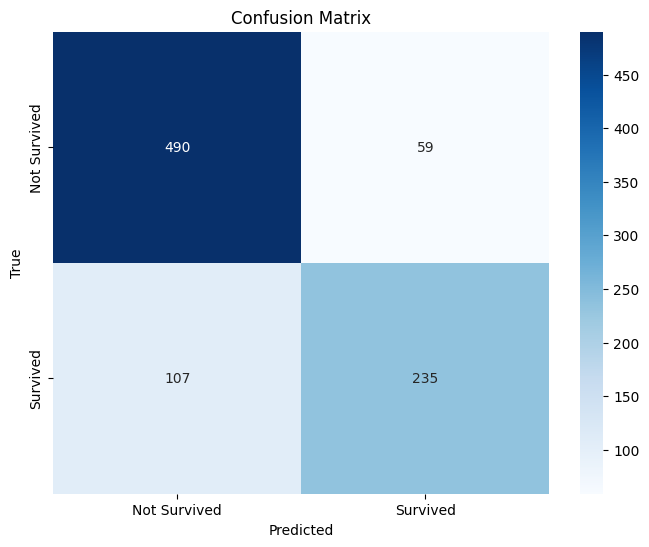

In [ ]:
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from tabulate import tabulate
import pandas as pd
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
import matplotlib.pyplot as plt
# Cargar el dataset limpiado y con one hot encoding.
df = pd.read_csv('train_cleaned.csv')

# Definir las variables independientes y dependientes
df_x = df[['Pclass', 'Male', 'Female', 'Age', 'SibSp', 'Parch', 'Cherbourg', 'Queenstown', 'Southampton']]
df_y = df['Survived']

# División del conjunto de datos
X_train, X_test, y_train, y_test = train_test_split(df_x, df_y, test_size=0.2, random_state=42)

# Cargar el dataset de test
df_test = pd.read_csv('test_cleaned.csv')

# Definir las variables independientes y dependientes para el test
df_x_test = df_test[['Pclass', 'Male', 'Female', 'Age', 'SibSp', 'Parch', 'Cherbourg', 'Queenstown', 'Southampton']]
df_y_test = df_test['Survived']

# Definir los mejores hiperparámetros encontrados
best_n_neighbors = 9
best_weights = 'uniform'
best_metric = 'euclidean'
best_algorithm = 'brute'

# Inicializar y entrenar el modelo con los mejores hiperparámetros
knn_best = KNeighborsClassifier(n_neighbors=best_n_neighbors, weights=best_weights, metric=best_metric, algorithm=best_algorithm)
knn_best.fit(X_train, y_train)

# Predecir en el conjunto de prueba
y_pred_test = knn_best.predict(df_x_test)

# Evaluar el modelo
accuracy_test = accuracy_score(df_y_test, y_pred_test)
classification_rep_test = classification_report(df_y_test, y_pred_test, digits=4)
conf_matrix_test = confusion_matrix(df_y_test, y_pred_test)

# Mostrar las métricas
print(f'Accuracy: {accuracy_test:.6f}')

# Formatear el reporte de clasificación
print('Classification Report:')
print(classification_rep_test)

# Graficar la matriz de confusión
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix_test, annot=True, fmt='d', cmap='Blues', xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()

## Red Neuronal

Finalmente, la red neuronal. Este es un modelo de machine learning el cual está compuesto por capas de neuronas que procesan la información recibida por la capa anterior y la transmite a la siguiente.

Para este problema en particular, una modelo de este tipo es particularmente adecuado debido a su capacidad para capturar y modelar relaciones complejas y no lineales entre múltiples features, como la edad, el sexo o la clase del boleto, los cuales influyen en la probabilidad de supervivencia. Estas características permiten que el modelo aprenda patrones ocultos en los datos, optimizando la precisión en la predicción de la supervivencia de los pasajeros


In [ ]:
from sklearn import datasets, model_selection
from sklearn.model_selection import train_test_split
import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Dense, BatchNormalization, Dropout
from tensorflow.keras import regularizers
import matplotlib.pyplot as plt

# Load dataset
dataset = pd.read_csv('train_cleaned.csv')


X = dataset[[f for f in dataset.columns if f != 'Survived']]  # Selecciona todas las columnas excepto 'Survived'
y = dataset['Survived']  # Selecciona la columna 'Survived' como la etiqueta


X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.1, random_state=44)

# Verificar las formas de los conjuntos de entrenamiento y prueba
print('\nX_train shape:', X_train.shape)
print('First 5 rows of X_train:\n', X_train.head())
print('\ny_train shape:', y_train.shape)
print('First 5 values of y_train:\n', y_train.head())

# y_train = tf.keras.utils.to_categorical(np.array(y_train))
# y_test = tf.keras.utils.to_categorical(np.array(y_test))

print('Number of features in X_train:', X_train.shape[1])


X_train shape: (801, 9)
First 5 rows of X_train:
      Pclass  Male  Female   Age  SibSp  Parch  Cherbourg  Queenstown  \
581       1     0       1  39.0      1      1          1           0   
810       3     1       0  26.0      0      0          0           0   
291       1     0       1  19.0      1      0          1           0   
777       3     0       1   5.0      0      0          0           0   
284       1     1       0  21.0      0      0          0           0   

     Southampton  
581            0  
810            1  
291            0  
777            1  
284            1  

y_train shape: (801,)
First 5 values of y_train:
 581    1
810    0
291    1
777    1
284    0
Name: Survived, dtype: int64
Number of features in X_train: 9


In [ ]:
def plot_acc_loss(training_history):
  plt.plot(training_history.history['accuracy'])
  plt.plot(training_history.history['val_accuracy'])
  # plt.ylim([0, 1])
  plt.title('Accuracy vs. Epochs')
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='lower right')
  plt.show()
  plt.plot(training_history.history['loss'])
  plt.plot(training_history.history['val_loss'])
  plt.title('Loss vs. Epochs')
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Training', 'Validation'], loc='upper right')
  plt.show()

### Configuración

Para la implementación de la red neuronal, se utilizaron diversas técnicas con el objetivo de mejorar tanto la estabilidad del entrenamiento como la capacidad de generalización del modelo. Las configuraciones críticas de la red neuronal se describen a continuación:

* Dropout: Consiste en desactivar aleatoriamente un porcentaje de las neuronas durante cada epoch del entrenamiento, acción que ayuda a prevenir el overfitting al asegurar que el modelo no dependa en exceso de neuronas específicas, permitiendo una mejor generalización cuando se expone a datos nuevos.

* Batch Normalization: Estandariza los outputs y estabiliza el proceso de aprendizaje al mitigar problemas relacionados con la inicialización de los pesos, mejorando la generalización del modelo.

* Early Stopping: Detiene el entrenamiento cuando el rendimiento del modelo en el test set deja de mejorar, evitando el overfitting.

* Learning Rate Reduction: Ajusta dinámicamente el learning rate cuando una métrica no ha mejorado en un número determinado de epochs (patience), lo cual permite afinar el modelo con mayor precisión durante la etapa de entrenamiento.

* Función de Activación: Se implementó la función de activación ReLU en las capas ocultas de la red y Sigmoid para la capa de salida, debido a que el label es de naturaleza binaria (0 ó 1).

* Batch Size: Ajustado para equilibrar la velocidad del entrenamiento y la precisión del modelo. Cuando esta configuración es más grande, se obtienen actualizaciones más estables en los pesos. En cambio, si es pequeño puede generar ruido en el entrenamiento, pero también puede terminar en una mejor generalización.

* Validation Split: Se utilizó un validation split del 15% del conjunto de entrenamiento para reservar una porción de los datos con el fin de validar el modelo durante el proceso de entrenamiento. Esto permite diagnosticar el desempeño de la red neuronal en datos no vistos, ayudando a ajustar el modelo de manera eficiente y a prevenir problemas como el overfitting.



In [ ]:
def set_nn_model_architecture_2(X_train):
    model = Sequential(name='my_sequential_model_2')

    # Capa de input. Usa ReLU para evitar problemas de vanishing gradient.
    model.add(Dense(units=64, input_shape=(X_train.shape[1],), activation='relu',
                    kernel_initializer=tf.keras.initializers.HeUniform(seed=0),
                    bias_initializer='ones', name='hiddenlayer1'))

    # Dos capas adicionales con 128 unidades cada una
    model.add(Dense(units=128, activation='relu', name='hiddenlayer2'))
    model.add(Dense(units=128, activation='relu', name='hiddenlayer3'))

    # Dropout al 30% para prevenir overfitting.
    model.add(Dropout(rate=0.3, name='dropout1'))

    model.add(Dense(units=64, activation='relu', name='hiddenlayer4'))
    model.add(Dense(units=32, activation='relu', name='hiddenlayer5'))

    # Normalización para estabilizar y acelerar el entrenamiento.
    model.add(BatchNormalization(name='batch_normalization'))


    model.add(Dense(units=32, activation='relu', name='hiddenlayer6'))
    model.add(Dense(units=64, activation='relu', name='hiddenlayer7'))

    # Segundo Dropout al 30% para controlar overfitting en las capas posteriores.
    model.add(Dropout(rate=0.3, name='dropout2'))

    model.add(Dense(units=128, activation='relu', name='hiddenlayer8'))
    model.add(Dense(units=128, activation='relu', name='hiddenlayer9'))

    # Capa de salida para clasificación binaria, usando sigmoid.
    model.add(Dense(units=1, activation='sigmoid', name='outputlayer'))

    model.summary()
    return model

In [ ]:
# Si el modelo no mejora en 200 epochs, para el entrenamiento.
early_stopping = tf.keras.callbacks.EarlyStopping(patience = 200, mode =  "min")

# Si un métrico no mejora, reduce el learning rate.
lr_reduction = tf.keras.callbacks.ReduceLROnPlateau(patience = 200, factor = 0.2)

/usr/local/lib/python3.10/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "my_sequential_model_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━┓
┃ Layer (type)                         ┃ Output Shape                ┃         Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━┩
│ hiddenlayer1 (Dense)                 │ (None, 64)                  │             640 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenlayer2 (Dense)                 │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenlayer3 (Dense)                 │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout1 (Dropout)                   │ (None, 128)                 │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenlayer4 (Dense)                 │ (None, 64)                  │           8,256 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenlayer5 (Dense)                 │ (None, 32)                  │           2,080 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ batch_normalization                  │ (None, 32)                  │             128 │
│ (BatchNormalization)                 │                             │                 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenlayer6 (Dense)                 │ (None, 32)                  │           1,056 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenlayer7 (Dense)                 │ (None, 64)                  │           2,112 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ dropout2 (Dropout)                   │ (None, 64)                  │               0 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenlayer8 (Dense)                 │ (None, 128)                 │           8,320 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ hiddenlayer9 (Dense)                 │ (None, 128)                 │          16,512 │
├──────────────────────────────────────┼─────────────────────────────┼─────────────────┤
│ outputlayer (Dense)                  │ (None, 1)                   │             129 │
└──────────────────────────────────────┴─────────────────────────────┴─────────────────┘

 Total params: 64,065 (250.25 KB)

 Trainable params: 64,001 (250.00 KB)

 Non-trainable params: 64 (256.00 B)

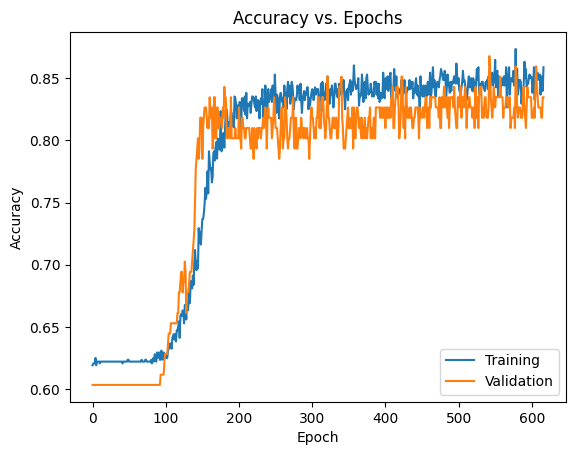

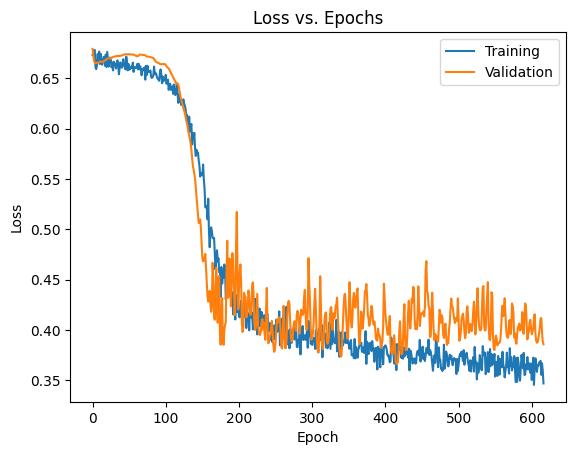

In [ ]:
model_3 = set_nn_model_architecture_2(X_train)
model_3.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.0001), loss='binary_crossentropy', metrics=['accuracy'])

training_history_3 = model_3.fit(X_train, y_train, epochs=2000, validation_split=0.15, batch_size=256,
                                 callbacks=[early_stopping, lr_reduction], verbose=0)
plot_acc_loss(training_history_3)

Las gráficas anteriores no deben de confundirse con el cálculo de precisión siguiente.

Las gráficas muestran la comparación de los conjuntos de Validación vs Entrenamiento, mientras que el porcentaje del siguient bloque de código, representa el valor para el conjunto de Prueba.

In [ ]:
# Evaluar el modelo utilizando el test set
test_loss, test_acc = model_3.evaluate(X_test, y_test, verbose=0)
print('test_loss: {}\ntest_acc: {} %'.format(round(test_loss,4), round(test_acc*100,4)))

test_loss: 0.5829
test_acc: 72.2222 %
